# 샘플 데이터와 Boosting Classification

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


np.random.seed(2021)

## 1. Data

### 1.1 Sample Data

실습에서 사용할 데이터를 생성해보겠습니다.

In [ ]:
from sklearn.datasets import make_gaussian_quantiles


data_1, label_1 = make_gaussian_quantiles(
    cov=2, n_samples=200, n_features=2, n_classes=2, random_state=2021
)
data_2, label_2 = make_gaussian_quantiles(
    mean=(3, 3), cov=1.5, n_samples=300, n_features=2, n_classes=2, random_state=2021
)

In [ ]:
data = np.concatenate((data_1, data_2))
label = np.concatenate((label_1, - label_2 + 1))

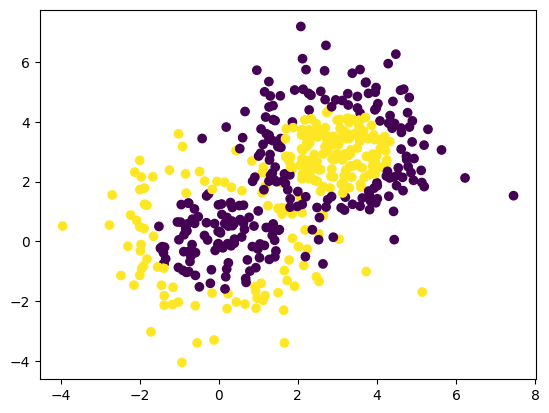

In [ ]:
plt.scatter(data[:,0], data[:,1], c=label)

# 2개의 원이 있고, 원안에 각각 다른 레이블이 들어가 있음

### 1.2 Data Split

In [ ]:
from sklearn.model_selection import train_test_split

train_data, test_data, train_label, test_label = train_test_split(
    data, label, train_size=0.7, random_state=2021)

### 1.3 시각화 데이터

In [ ]:
x_min, x_max = data[:, 0].min() - 1, data[:, 0].max() + 1
y_min, y_max = data[:, 1].min() - 1, data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

## 2. Decision Tree

우선 기본적인 Decision Tree를 학습후 결과를 비교해 보겠습니다.

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree = DecisionTreeClassifier(max_depth=2)

### 2.1 학습

In [ ]:
tree.fit(train_data, train_label)

DecisionTreeClassifier(max_depth=2)

### 2.2 예측

In [ ]:
tree_train_pred = tree.predict(train_data)
tree_test_pred = tree.predict(test_data)

### 2.3 평가

In [ ]:
from sklearn.metrics import accuracy_score

tree_train_acc = accuracy_score(train_label, tree_train_pred)
tree_test_acc = accuracy_score(test_label, tree_test_pred)

In [ ]:
print(f"Tree train accuray is {tree_train_acc:.4f}")
print(f"Tree test accuray is {tree_test_acc:.4f}")   

Tree train accuray is 0.7286
Tree test accuray is 0.6867


### 2.4 시각화

In [ ]:
tree_Z = tree.predict(np.c_[xx.ravel(), yy.ravel()])
tree_Z = tree_Z.reshape(xx.shape)

Text(0.5, 1.0, 'test data')

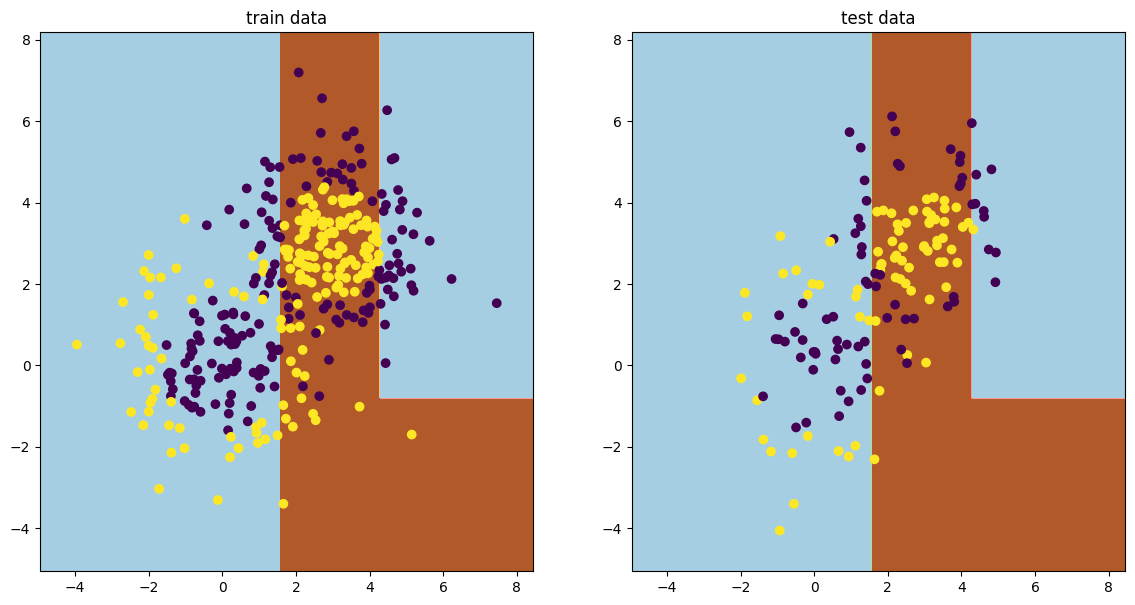

In [ ]:
plt.figure(figsize=(14, 7))
plt.subplot(121)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train data")

plt.subplot(122)
cs = plt.contourf(xx, yy, tree_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test data")

# train data 가운데 영역을 맞추는 식으로 영역을 만들었음
# 하늘색 부분에서 맞추지 못함

## 3. AdaBoost

다음은 AdaBoost를 학습해 보겠습니다.
AdaBoost는 `sklearn.ensemble`의 `AdaBoostClassifier`로 생성할 수 있습니다.  
`AdaBoostClassifier`는 `base_estimator`를 선언해주어야 합니다.  
가장 간단한 if else로 데이터가 분류 될 수 있도록 depth가 1인 tree로 base estimator로 만들겠습니다.

In [ ]:
from sklearn.ensemble import AdaBoostClassifier


ada_boost = AdaBoostClassifier(DecisionTreeClassifier(max_depth=1))

### 3.1 학습

In [ ]:
ada_boost.fit(train_data, train_label)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1))

### 3.2 예측

In [ ]:
ada_boost_train_pred = ada_boost.predict(train_data)
ada_boost_test_pred = ada_boost.predict(test_data)

### 3.3 평가

In [ ]:
from sklearn.metrics import accuracy_score

ada_boost_train_acc = accuracy_score(train_label, ada_boost_train_pred)
ada_boost_test_acc = accuracy_score(test_label, ada_boost_test_pred)

In [ ]:
print(f"Ada Boost train accuray is {ada_boost_train_acc:.4f}")
print(f"Ada Boost test accuray is {ada_boost_test_acc:.4f}")   

Ada Boost train accuray is 0.9486
Ada Boost test accuray is 0.8600


### 3.4 시각화

In [ ]:
ada_boost_Z = ada_boost.predict(np.c_[xx.ravel(), yy.ravel()])
ada_boost_Z = ada_boost_Z.reshape(xx.shape)

Text(0.5, 1.0, 'test_data')

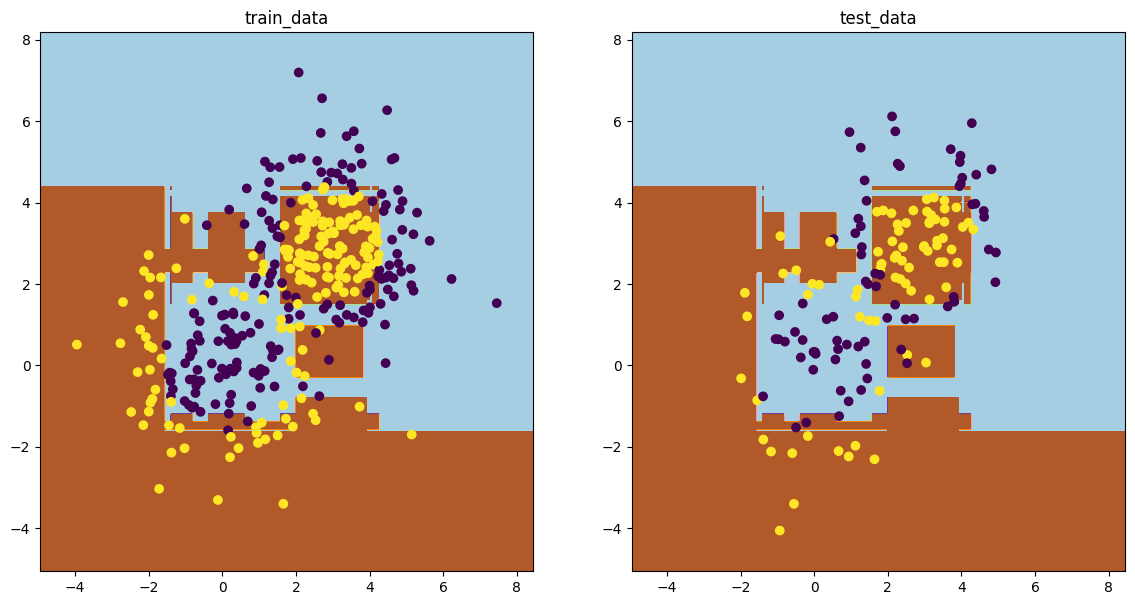

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train_data")

plt.subplot(122)
cs = plt.contourf(xx, yy, ada_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test_data")

# train data에서는 데이터 영역을 잘 예측함

## 4. GradientBoost

다음은 Gradient Boost입니다.  
Gradient Boost는 `sklearn.ensemble` 의 `GradientBoostingClassifier`로 생성할 수 있습니다.  
Gradient Boost또한 간단한 if else로 만들 수 있도록 max_depth를 1로 주겠습니다.

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

grad_boost = GradientBoostingClassifier(max_depth=1)

### 4.1 학습

In [ ]:
grad_boost.fit(train_data, train_label)

GradientBoostingClassifier(max_depth=1)

### 4.2 예측

In [ ]:
grad_boost_train_pred = grad_boost.predict(train_data)
grad_boost_test_pred = grad_boost.predict(test_data)

### 4.3 평가

In [ ]:
from sklearn.metrics import accuracy_score

grad_boost_train_acc = accuracy_score(train_label, grad_boost_train_pred)
grad_boost_test_acc = accuracy_score(test_label, grad_boost_test_pred)

In [ ]:
print(f"Gradient Boost train accuray is {grad_boost_train_acc:.4f}")
print(f"Gradient Boost test accuray is {grad_boost_test_acc:.4f}")   

Gradient Boost train accuray is 0.8886
Gradient Boost test accuray is 0.8200


### 4.4 시각화

In [ ]:
grad_boost_Z = grad_boost.predict(np.c_[xx.ravel(), yy.ravel()])
grad_boost_Z = grad_boost_Z.reshape(xx.shape)
# 서로 파고드는 형식으로 분류됨

Text(0.5, 1.0, 'test_data')

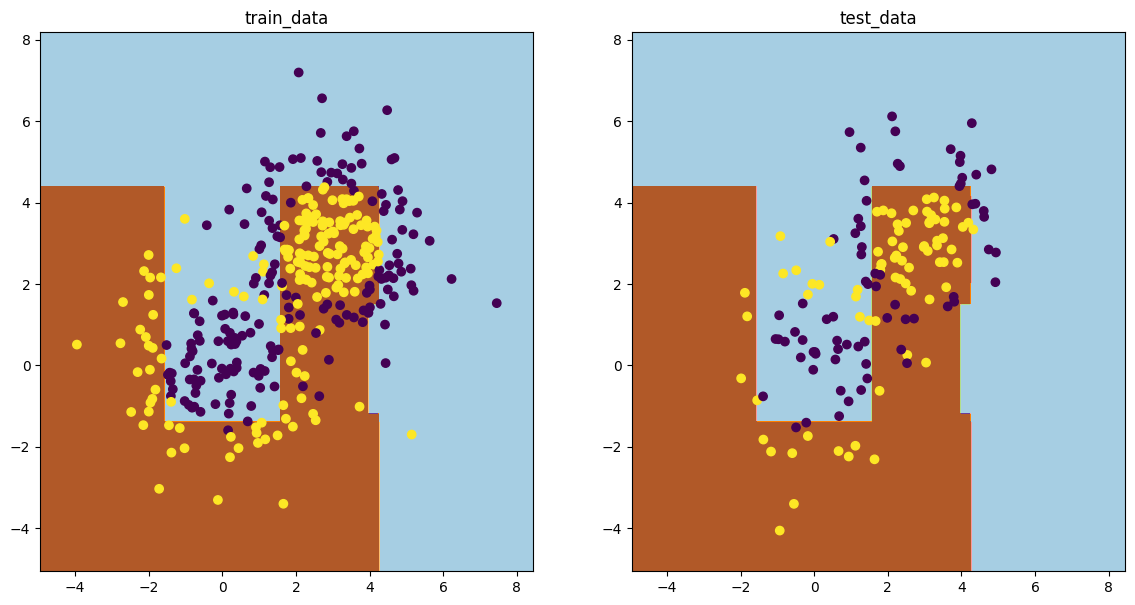

In [ ]:
plt.figure(figsize=(14, 7))

plt.subplot(121)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(train_data[:,0], train_data[:,1], c=train_label)
plt.title("train_data")

plt.subplot(122)
cs = plt.contourf(xx, yy, grad_boost_Z, cmap=plt.cm.Paired)
plt.scatter(test_data[:,0], test_data[:,1], c=test_label)
plt.title("test_data")

## 5. 마무리

In [ ]:
print(f"Tree test accuray is {tree_test_acc:.4f}")
print(f"Gradient Boost test accuray is {grad_boost_test_acc:.4f}")
print(f"Ada Boost test accuray is {ada_boost_test_acc:.4f}")
# Ada boost 성능이 가장 좋음

Tree test accuray is 0.6867
Gradient Boost test accuray is 0.8200
Ada Boost test accuray is 0.8600


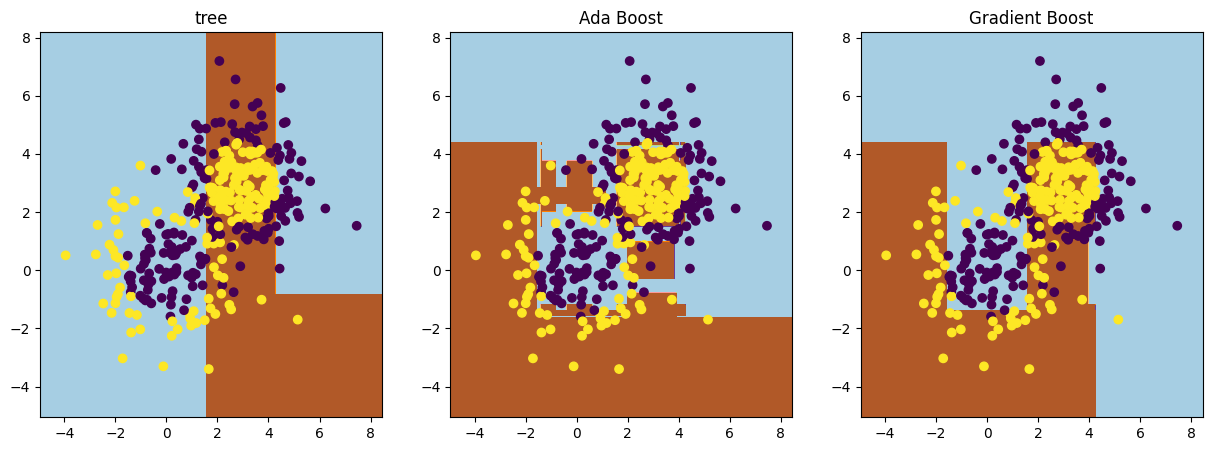

In [ ]:
# 모든 데이터 시각화
# depth가 2인 트리는 아래와 같이 분류를 하였고, Ada boost는 가운데를 파고드는 형식으로, Gradient Boost는 위를 파고드는 형식으로 모델을 만들었음
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
Z_name = [
    ("tree", tree_Z),
    ("Ada Boost", ada_boost_Z),
    ("Gradient Boost", grad_boost_Z)
]
for idx, (name, Z) in enumerate(Z_name):
    ax = axes[idx]
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)
    ax.scatter(train_data[:,0], train_data[:,1], c=train_label)
    ax.set_title(name)